In [75]:
import numpy as np
import matplotlib.pyplot as plt

In [188]:
def S21_abs(x, Q, Q_c, phi, x_0, b,c,a):
    num = pow(Q,2)-2*np.sin(phi)*Q*Q_c-4*pow(Q,2)*Q_c*np.cos(phi)*(x-x_0)/x_0
    den = pow(Q_c,2)*(1+4 * pow(Q * (x-x_0)/x_0 , 2))
    temp = np.sqrt(1+num/den)*(b*x+c)
    return temp

In [189]:
stringa = 'C:/Users/kid/SynologyDrive/Lab2023/KIDs/QTLab2324/IRDetection/Test_data/Resonance02.txt'
dati = list(np.genfromtxt(stringa))

In [190]:
f = []
Q = []
I = []
for i in dati:
    f.append(i[0])
    I.append(i[1])
    Q.append(i[2])
f = np.array(f)
Q = np.array(Q)
I = np.array(I)

In [191]:
S21 = np.sqrt(I**2 + Q**2)

In [192]:
from scipy.optimize import curve_fit

In [193]:
b = (S21[0]-S21[-1])/(f[0]-f[-1])
q = S21[0]-b*f[-1]

In [194]:
q

13.81335269519715

In [195]:
par = [3e3, 3.8e3, 1, 5.737e9, b, q, 1e-26]
popt, pcov = curve_fit(S21_abs, f, S21, p0=par)#, sigma=None, absolute_sigma=False, check_finite=None, bounds=(-inf, inf), method=None, jac=None, *, full_output=False, nan_policy=None, **kwargs)

c:\Users\kid\AppData\Local\Programs\Python\Python38\lib\site-packages\scipy\optimize\_minpack_py.py:906: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


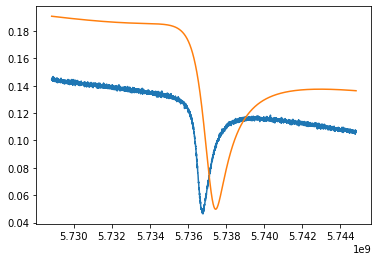

In [196]:
y = S21_abs(f, par[0],par[1],par[2],par[3],par[4], par[5],par[6])
plt.plot(f, S21)
plt.plot(f, y)

In [84]:
popt

array([1.26508254e-01, 4.38252941e+03, 6.95302132e+03, 8.74584507e-01,
       5.73642093e+09])